In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [8]:
#loading the dataset using Pandas
df = pd.read_csv('hr-analytics-employee-attrition-performance.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df.shape == df.dropna().shape

True

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

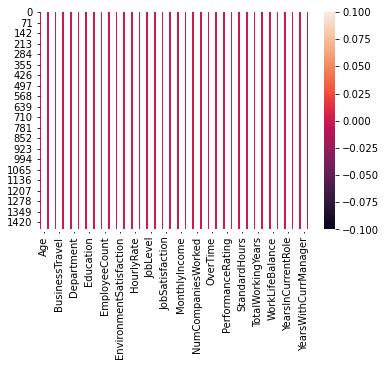

In [12]:
sns.heatmap(df.isnull(),annot=True)

In [13]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Dataset Structure: 1470 rows, 35 features
Missing Data: No missing data
Data Type: int64 and object


In [14]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [16]:
da = pd.get_dummies(df).drop(columns=['Attrition_No','OverTime_No'])
corr = da.corr()
corr.loc[:,['Attrition_Yes']].sort_values(by='Attrition_Yes', ascending=False)

,Attrition_Yes
Attrition_Yes,1.000000
OverTime_Yes,0.246118
MaritalStatus_Single,0.175419
JobRole_Sales Representative,0.157234
BusinessTravel_Travel_Frequently,0.115143
JobRole_Laboratory Technician,0.098290
Department_Sales,0.080855
DistanceFromHome,0.077924
EducationField_Technical Degree,0.069355
EducationField_Marketing,0.055781


# Machine Learning

In [17]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score

feature_cols = ['Age', 'DailyRate', 
       'DistanceFromHome', 'Education',       
       'HourlyRate', 'JobInvolvement', 'JobLevel', 
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','EnvironmentSatisfaction','JobSatisfaction',
       'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 
        #'Attrition_Yes'
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_Yes']
X = da[feature_cols] # Features
y = da.Attrition_Yes # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
# Fit the model
rfc.fit(X_train,y_train)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), feature_cols), reverse=True))

#Predict the response for test dataset
y_pred = rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Features sorted by their score:
[(0.0733, 'MonthlyIncome'), (0.0535, 'Age'), (0.0529, 'DailyRate'), (0.0473, 'DistanceFromHome'), (0.047, 'MonthlyRate'), (0.0464, 'TotalWorkingYears'), (0.0462, 'OverTime_Yes'), (0.046, 'YearsAtCompany'), (0.0455, 'HourlyRate'), (0.0338, 'EnvironmentSatisfaction'), (0.0329, 'TrainingTimesLastYear'), (0.0309, 'PercentSalaryHike'), (0.0287, 'NumCompaniesWorked'), (0.0285, 'StockOptionLevel'), (0.0282, 'JobInvolvement'), (0.0281, 'YearsSinceLastPromotion'), (0.0276, 'YearsWithCurrManager'), (0.0248, 'YearsInCurrentRole'), (0.0247, 'JobSatisfaction'), (0.0224, 'WorkLifeBalance'), (0.0216, 'RelationshipSatisfaction'), (0.0206, 'JobLevel'), (0.0201, 'Education'), (0.0146, 'MaritalStatus_Single'), (0.014, 'BusinessTravel_Travel_Frequently'), (0.0114, 'EducationField_Marketing'), (0.0099, 'Department_Sales'), (0.0092, 'JobRole_Sales Representative'), (0.0083, 'Department_Research & Development'), (0.0081, 'JobRole_Laboratory Technician'), (0.0081, 'EducationFie

What are key factors that are playing into current attrition rates? With accuracy above 83.90%

MonthlyIncome
DailyRate
DistanceFromHome
OverTime
YearsAtCompany
Age

In [18]:
corr.loc[:,['JobSatisfaction']].sort_values(by='JobSatisfaction', ascending=False)


,JobSatisfaction
JobSatisfaction,1.000000
EducationField_Life Sciences,0.052004
Gender_Male,0.033252
DailyRate,0.030571
BusinessTravel_Travel_Frequently,0.027117
MaritalStatus_Single,0.024571
OverTime_Yes,0.024539
JobRole_Research Scientist,0.020503
PercentSalaryHike,0.020002
BusinessTravel_Non-Travel,0.019802


In [19]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score

feature_cols = ['Age', 'DailyRate', 
       'DistanceFromHome', 'Education',       
       'HourlyRate', 'JobInvolvement', 'JobLevel', 
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','EnvironmentSatisfaction',#'JobSatisfaction',
       'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 
       'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_Yes']
X = da[feature_cols] # Features
y = da.JobSatisfaction # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X_train,y_train)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), feature_cols), reverse=True))

#Predict the response for test dataset
y_pred = rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Features sorted by their score:
[(0.0687, 'DailyRate'), (0.0605, 'HourlyRate'), (0.0604, 'MonthlyIncome'), (0.0592, 'MonthlyRate'), (0.0497, 'Age'), (0.048, 'DistanceFromHome'), (0.045, 'PercentSalaryHike'), (0.0446, 'TotalWorkingYears'), (0.0414, 'YearsAtCompany'), (0.0351, 'YearsInCurrentRole'), (0.0338, 'NumCompaniesWorked'), (0.0336, 'YearsWithCurrManager'), (0.0305, 'TrainingTimesLastYear'), (0.0302, 'YearsSinceLastPromotion'), (0.0277, 'Education'), (0.0263, 'EnvironmentSatisfaction'), (0.0259, 'RelationshipSatisfaction'), (0.0207, 'WorkLifeBalance'), (0.0202, 'JobInvolvement'), (0.0199, 'StockOptionLevel'), (0.0166, 'JobLevel'), (0.0125, 'Gender_Male'), (0.0121, 'EducationField_Life Sciences'), (0.0115, 'MaritalStatus_Married'), (0.0112, 'OverTime_Yes'), (0.011, 'EducationField_Medical'), (0.0102, 'MaritalStatus_Single'), (0.0093, 'MaritalStatus_Divorced'), (0.0087, 'BusinessTravel_Travel_Rarely'), (0.0086, 'Department_Research & Development'), (0.0085, 'BusinessTravel_Travel_Fr

What are key factors that are playing into current satisfaction rates? With accuracy of 26%

DailyRate
MonthlyRate



We can predict when employee leave with accuracy above 83.90% using RandomForestClassifier

In [20]:
import joblib as jb
jb.dump(rfc,'hr-analytics-employee-attrition-performance.pkl')

['hr-analytics-employee-attrition-performance.pkl']